## Install required packages
Run the line below to ensure that all required packages are installed.

In [ ]:
!pip install -r requirements.txt

## Getting the Data


In [ ]:
!kaggle competitions download -c ncaam-march-mania-2021 -p data
!unzip data/ncaam-march-mania-2021.zip -d data

# Imports
Run the cell below to import all required modules.

In [1]:
import pandas as pd
from seaborn import heatmap
from matplotlib import pyplot as plt
file_path = 'data/MRegularSeasonCompactResults.csv'

# Inspecting the Compact Tournament results.
In this notebook we will inspect the compact regular season results provided by the `MRegularSeasonCompactResults.csv` file.

In [2]:
df = pd.read_csv(file_path)
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


### Outcome Matrix
Below we will create an all-time outcome matrix, which will count the total number of wins for every ordered tuple in the form `(WTeamID, LTeamID)`.

In [3]:
def compute_outcome_matrix(file_path, season=None):
    """Takes a file path to a compact results file and returns 
    an outcome matrix for all Mens NCAA games. Given an optional season,
    outcomes are restricted to the season in question. 
    """
    df = pd.read_csv(file_path)
    if season:
        df = df[df['Season'] == season]
    team_ids_by_game = df[['WTeamID', 'LTeamID']]
    win_counts = team_ids_by_game.value_counts().reset_index()
    col_names = win_counts.columns.to_list()
    col_names[2] = 'Wins'
    win_counts.columns = col_names
    outcome_matrix = win_counts.pivot_table(values= 'Wins', index='WTeamID', columns='LTeamID').fillna(0)
    return outcome_matrix

In [4]:
def show_outcome_matrix(file_path, season=None):
    """Takes the file path to MNCAATourneyCompactResults.csv and 
    plots a heatmap of outcomes for all Mens NCAA games. Outcomes can be
    restricted to a specific season by passing a season."""
    outcome_matrix = compute_outcome_matrix(file_path, season)
    fig, ax = plt.subplots(figsize=(20,15));
    if season:
        ax.set_title(f'Outcome matrix for {season} season.')
    else:
        ax.set_title('All-Time Outcome Matrix');
    heatmap(outcome_matrix, cmap='Blues', ax=ax);
    return fig

#### All-time outcome heat map
Below, we see that the all-time outcome matrix is fairly sparse, with the majority of pairings having never occurred.

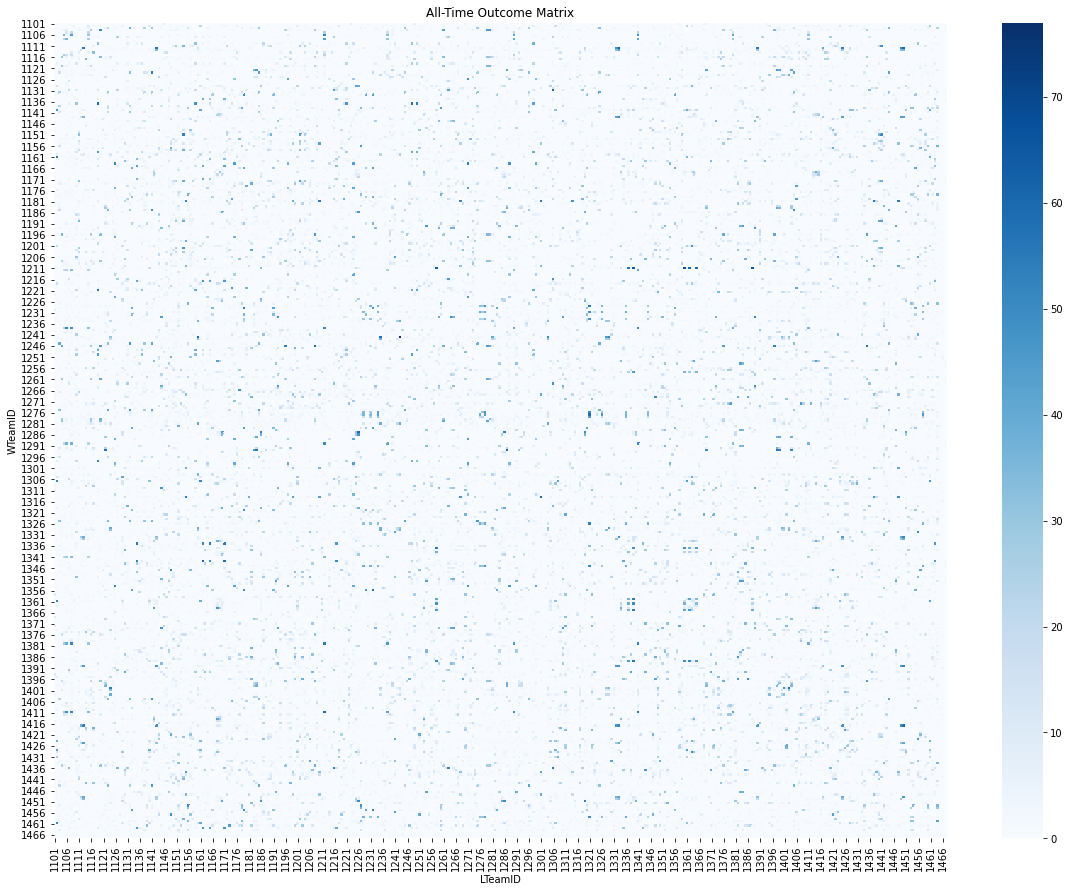

In [5]:
fig = show_outcome_matrix(file_path)

#### Outcome heat map for 2015 season
Below, we see that even seasonal data is sparse.

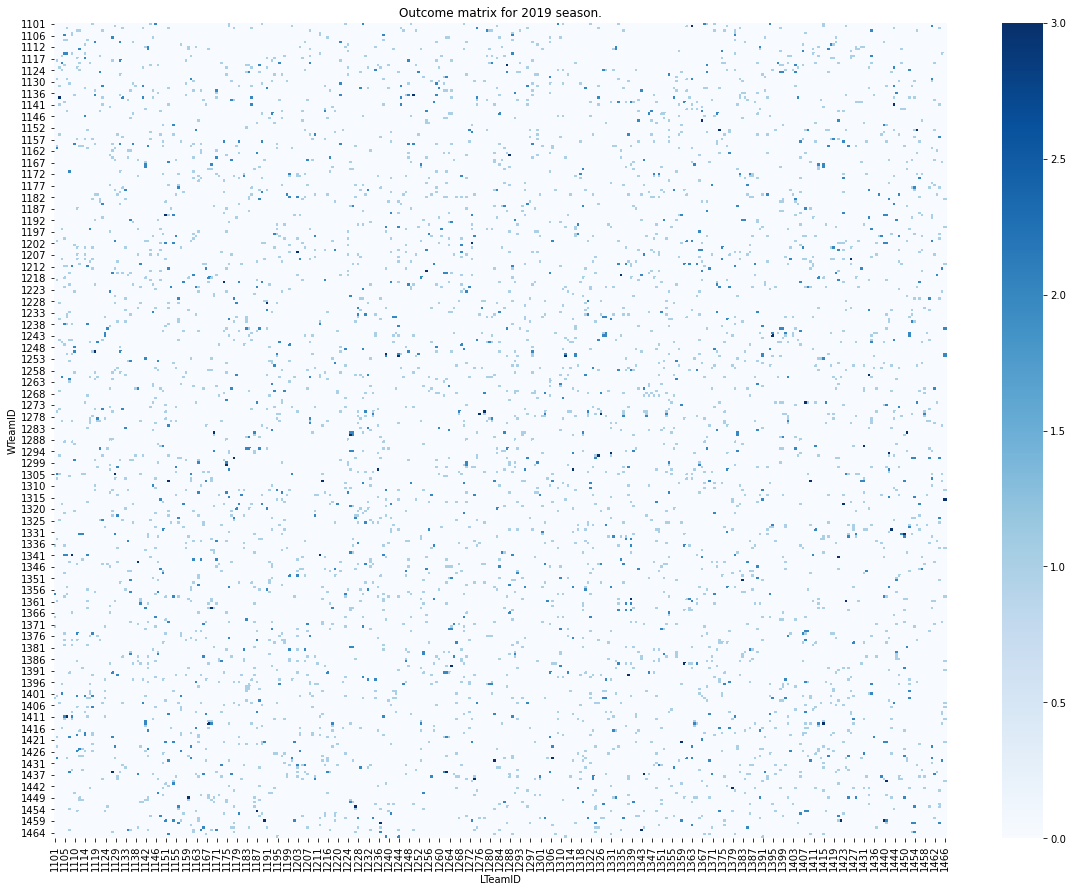

In [7]:
fig = show_outcome_matrix(file_path, season=2019)